In [147]:
# Install/Import Libs/Modules required

import os
import subprocess
import glob
import pandas as pd
from google.cloud import bigquery
from pandas_gbq import read_gbq
from datetime import datetime


In [37]:
# Get Apple & Google App Store data from GitHub Repo, then convert to Dataframe (apple and google)

# Apple
## Clone the repository
subprocess.run(["git", "clone", "https://github.com/gauthamp10/apple-appstore-apps.git"])
## Change directory to the dataset folder
os.chdir("apple-appstore-apps\dataset")
## Extract the tar.lzma file
subprocess.run(["tar", "-xvf", "appleAppData.json.tar.lzma"])

## Read into DataFrame
apple = pd.read_json("appleAppData.json")

# Google
## Clone the repository
subprocess.run(["git", "clone", "https://github.com/gauthamp10/Google-Playstore-Dataset.git"])
## Change directory to the dataset folder
os.chdir("Google-Playstore-Dataset/dataset")
## Extract all .tar.gz files
for f in os.listdir():
    if f.endswith(".tar.gz"):
        subprocess.run(["tar", "-xvf", f])
combined_csv = "Google-Playstore-Dataset.csv"
with open(combined_csv, "wb") as outfile:
    for csvfile in glob.glob("Part?.csv"):
        with open(csvfile, "rb") as infile:
            outfile.write(infile.read())

## Read into DataFrame
google = pd.read_csv("Google-Playstore-Dataset.csv", header = 0) # low_memory = False




FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Google-Playstore-Dataset/dataset'

In [143]:
# No. of records for both apple and google df
print(f"No. of Records in google repo list: {'{:,.0f}'.format(len(google))} rows")
print(f"No. of Records in apple repo list: {'{:,.0f}'.format(len(apple))} rows")

print(f"\n{google.shape[1]} Columns in google repo list:")
print(google.dtypes)

print(f"\n{apple.shape[1]} Columns in apple repo list:")
print(apple.dtypes)

No. of Records in google repo list: 2,312,944 rows
No. of Records in apple repo list: 1,230,376 rows

24 Columns in google repo list:
App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object

21 Columns in apple repo list:
App_Id                      object
App_Name                    object
AppStore_Url                object
Primary_Genre      

In [209]:
# Convert Last Update Column to DateTime format

google['Last Updated Date'] = pd.to_datetime(google['Last Updated'], format='%b %d, %Y')

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Last Updated Date
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,2020-02-26
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,2021-05-06
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,2019-08-19


In [235]:
# Filtering of Records, by Last Updated Date

# Condition Last Updated from Jan 2020 onwards & Rating not 0
google_filter1 = google[(google['Last Updated Date'] >= '2020-01-01') & (google["Rating"] != 0)]

# Condition Last Updated from Jan 2021 onwards & Rating not 0
google_filter2 = google[(google['Last Updated Date'] >= '2021-01-01') & (google["Rating"] != 0)]

# Condition Last Updated from Apr 2021 onwards & Rating not 0
google_filter3 = google[(google['Last Updated Date'] >= '2021-04-01') & (google["Rating"] != 0)]

# Condition Last Updated from Jul 2021 onwards & Rating not 0 
google_filter4 = google[(google['Last Updated Date'] >= '2021-06-01') & (google["Rating"] != 0)] # <--- Reccommended Cutoff (83k < 100k)

# Condition Last Updated from Oct 2021 onwards & Rating not 0
google_filter5 = google[(google['Last Updated Date'] >= '2021-10-01') & (google["Rating"] != 0)]

# To get list of App Id to scrap live info
google_live1 = pd.DataFrame({'App Id': google_filter1["App Id"]})
google_live2 = pd.DataFrame({'App Id': google_filter2["App Id"]})
google_live3 = pd.DataFrame({'App Id': google_filter3["App Id"]})
google_live4 = pd.DataFrame({'App Id': google_filter4["App Id"]})
google_live5 = pd.DataFrame({'App Id': google_filter5["App Id"]})

# Print the lengths

print(f"Original Total No. of Records in google repo list: {'{:,.0f}'.format(len(google))} rows")

print(f"\nLength of google_filter1: {'{:,.0f}'.format(len(google_live1))}, {'{:.3f}'.format((len(google_live1) / len(google)) * 100)}%")
print(f"Length of google_filter2: {'{:,.0f}'.format(len(google_live2))}, {'{:.3f}'.format((len(google_live2) / len(google)) * 100)}%")
print(f"Length of google_filter3: {'{:,.0f}'.format(len(google_live3))}, {'{:.3f}'.format((len(google_live3) / len(google)) * 100)}%")
print(f"Length of google_filter4: {'{:,.0f}'.format(len(google_live4))}, {'{:.3f}'.format((len(google_live4) / len(google)) * 100)}%")
print(f"Length of google_filter5: {'{:,.0f}'.format(len(google_live5))}, {'{:.3f}'.format((len(google_live5) / len(google)) * 100)}%")

Original Total No. of Records in google repo list: 2,312,944 rows

Length of google_filter1: 765,788, 33.109%
Length of google_filter2: 388,111, 16.780%
Length of google_filter3: 247,522, 10.702%
Length of google_filter4: 83,291, 3.601%
Length of google_filter5: 0, 0.000%


In [223]:
# Convert Last Update Column to DateTime format

apple['Last Updated Date'] = pd.to_datetime(apple['Updated'], format='%Y-%m-%dT%H:%M:%SZ')

In [227]:
apple.head(3)

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,Last Updated Date
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,0.0,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,,0.0,0,0.0,0,2018-12-21 21:30:36
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.0,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,,5.0,1,5.0,1,2019-07-23 20:31:09
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.0,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,,0.0,0,0.0,0,2021-05-30 21:08:54


In [242]:
# Filtering of Records, by Last Updated Date

# Condition Last Updated from Jan 2021 onwards 
apple_filter1 = apple[(apple['Last Updated Date'] >= '2021-01-01')]

# Condition Last Updated from Apr 2021 onwards 
apple_filter2 = apple[(apple['Last Updated Date'] >= '2021-04-01')]

# Condition Last Updated from Jul 2021 onwards 
apple_filter3 = apple[(apple['Last Updated Date'] >= '2021-07-01')]

# Condition Last Updated from Oct 2021 onwards
apple_filter4 = apple[(apple['Last Updated Date'] >= '2021-10-01')] # <--- Reccommended Cutoff (74k < 100k)

# Condition Last Updated from Jan 2022 onwards
apple_filter5 = apple[(apple['Last Updated Date'] >= '2022-01-01')]


# To get list of App Id to scrap live info
apple_live1 = pd.DataFrame({'App_Name': apple_filter1["App_Name"]})
apple_live2 = pd.DataFrame({'App_Name': apple_filter2["App_Name"]})
apple_live3 = pd.DataFrame({'App_Name': apple_filter3["App_Name"]})
apple_live4 = pd.DataFrame({'App_Name': apple_filter4["App_Name"]})
apple_live5 = pd.DataFrame({'App_Name': apple_filter5["App_Name"]})

# Print the lengths

print(f"Original Total No. of Records in google repo list: {'{:,.0f}'.format(len(apple))} rows")

print(f"\nLength of apple_live1: {'{:,.0f}'.format(len(apple_live1))}, {'{:.3f}'.format((len(apple_live1) / len(apple)) * 100)}%")
print(f"Length of apple_live2: {'{:,.0f}'.format(len(apple_live2))}, {'{:.3f}'.format((len(apple_live2) / len(apple)) * 100)}%")
print(f"Length of apple_live3: {'{:,.0f}'.format(len(apple_live3))}, {'{:.3f}'.format((len(apple_live3) / len(apple)) * 100)}%")
print(f"Length of apple_live4: {'{:,.0f}'.format(len(apple_live4))}, {'{:.3f}'.format((len(apple_live4) / len(apple)) * 100)}%")
print(f"Length of apple_live5: {'{:,.0f}'.format(len(apple_live5))}, {'{:.3f}'.format((len(apple_live5) / len(apple)) * 100)}%")

Original Total No. of Records in google repo list: 1,230,376 rows

Length of apple_live1: 527,820, 42.899%
Length of apple_live2: 425,002, 34.542%
Length of apple_live3: 295,963, 24.055%
Length of apple_live4: 74,460, 6.052%
Length of apple_live5: 58, 0.005%


In [115]:
# Filtering of Records

# Condition: Rating not 0, Rating Count not 0 and Minimum Installs > 100m
google_filter1 = google[(google["Rating"] != 0) & (google["Rating Count"] != 0) & (google["Minimum Installs"] > 100000000)]

# Condition: Rating not 0, Rating Count not 0 and Minimum Installs > 10m 
google_filter2 = google[(google["Rating"] != 0) & (google["Rating Count"] != 0) & (google["Minimum Installs"] > 10000000)]

# Condition: Rating not 0, Rating Count not 0 and Minimum Installs > 1m 
google_filter3 = google[(google["Rating"] != 0) & (google["Rating Count"] != 0) & (google["Minimum Installs"] > 1000000)]

# Condition: Rating not 0, Rating Count not 0 and Minimum Installs > 100k 
google_filter4 = google[(google["Rating"] != 0) & (google["Rating Count"] != 0) & (google["Minimum Installs"] > 100000)]

# Condition: Rating not 0, Rating Count not 0 and Minimum Installs > 10k 
google_filter5 = google[(google["Rating"] != 0) & (google["Rating Count"] != 0) & (google["Minimum Installs"] > 10000)]

# To get list of App Id to scrap live info
google_live1 = pd.DataFrame({'App Id': google_filter1["App Id"]})
google_live2 = pd.DataFrame({'App Id': google_filter2["App Id"]})
google_live3 = pd.DataFrame({'App Id': google_filter3["App Id"]})
google_live4 = pd.DataFrame({'App Id': google_filter4["App Id"]})
google_live5 = pd.DataFrame({'App Id': google_filter5["App Id"]})

# Print the lengths

print(f"Original Total No. of Records in google repo list: {'{:,.0f}'.format(len(google))} rows")

print(f"\nLength of google_filter1: {'{:,.0f}'.format(len(google_live1))}, {'{:.3f}'.format((len(google_live1) / len(google)) * 100)}%")
print(f"Length of google_filter2: {'{:,.0f}'.format(len(google_live2))}, {'{:.3f}'.format((len(google_live2) / len(google)) * 100)}%")
print(f"Length of google_filter3: {'{:,.0f}'.format(len(google_live3))}, {'{:.3f}'.format((len(google_live3) / len(google)) * 100)}%")
print(f"Length of google_filter4: {'{:,.0f}'.format(len(google_live4))}, {'{:.3f}'.format((len(google_live4) / len(google)) * 100)}%")
print(f"Length of google_filter5: {'{:,.0f}'.format(len(google_live5))}, {'{:.3f}'.format((len(google_live5) / len(google)) * 100)}%")


Original Total No. of Records in google repo list: 2,312,944 rows

Length of google_filter1: 135, 0.006%
Length of google_filter2: 1,508, 0.065%
Length of google_filter3: 14,290, 0.618%
Length of google_filter4: 74,753, 3.232%
Length of google_filter5: 257,300, 11.124%


In [43]:
# Scraping of Data

!pip install google-play-scraper

from google_play_scraper import app, reviews, Sort #Permissions

def app_results(app_id):
    try:
        result = app(app_id, lang='en', country='us')
        return result
    except Exception as e:
        # Handle the exception, and return a default value
        return "App not found"


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\royle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [183]:
google_live3.head(5)

# len(google_live1)

,App Id
92,com.lf.real.extreme.suv.offroad.drive.games.free
291,com.taxsee.driver
472,com.doonung.activity
561,fast.explorer.web.browser
631,com.veitch.themelodymaster.pmf


In [168]:
# Apply the function to each element in the "App Id" column

# google_live1['App Results'] = google_live1['App Id'].apply(app_results) # 135 records, 22s
# google_live2['App Results'] = google_live2['App Id'].apply(app_results) # 1508 records, 265s (4m 25s)
# google_live3['App Results'] = google_live3['App Id'].apply(app_results) # 14290 records, 2750s (45m 50s)
# google_live4['App Results'] = google_live4['App Id'].apply(app_results) (est. ~4hrs or ~240mins)
# google_live5['App Results'] = google_live5['App Id'].apply(app_results) (est. ~14hrs or ~830mins)


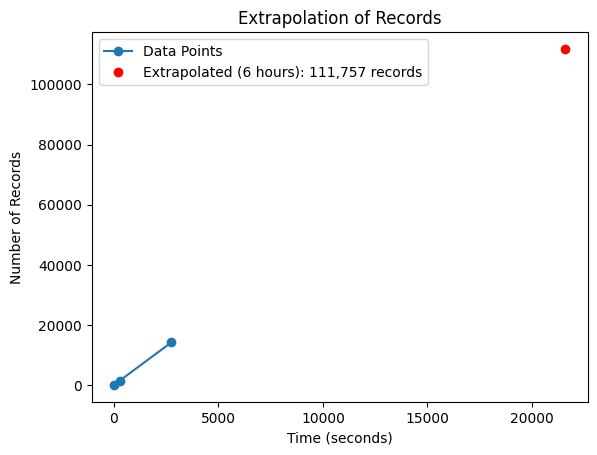

In [66]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Given data
records = [135, 1508, 14290]
seconds = [22, 265, 2750]

# Calculate records per second for each scenario
records_per_second = np.array(records) / np.array(seconds)

# Linear regression to estimate records per second
slope, intercept = np.polyfit(seconds, records, 1)

# Extrapolate for 6 hours (21600 seconds)
extrapolated_records = slope * 21600 + intercept


# Plot the line graph
plt.plot(seconds, records, 'o-', label='Data Points')
plt.plot(21600, extrapolated_records, 'ro', label=f'Extrapolated (6 hours): {"{:,.0f}".format(int(extrapolated_records))} records')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Records')
plt.title('Extrapolation of Records')
plt.legend()
plt.show()

In [205]:
google_live_selection = google_live2 # google_live1, google_live2

# Use json_normalize to split the dictionary into new columns
google_live1_cleaned = pd.json_normalize(google_live_selection['App Results']).dropna(subset=['title'])

# Print the result
len(google_live1_cleaned)
# google_live1_cleaned.columns


1374

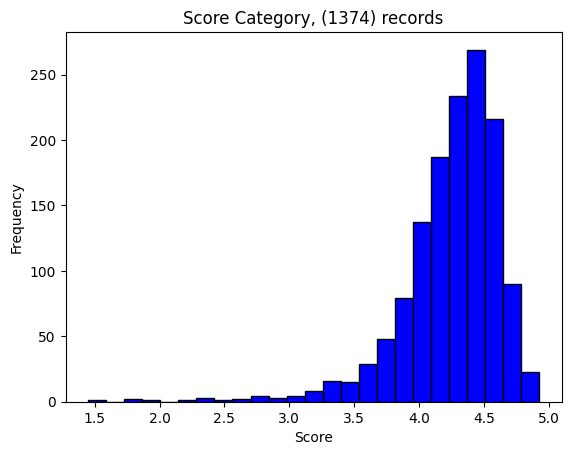

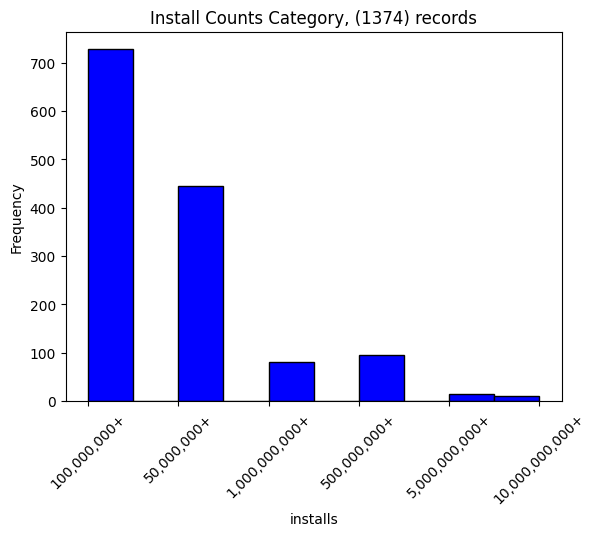

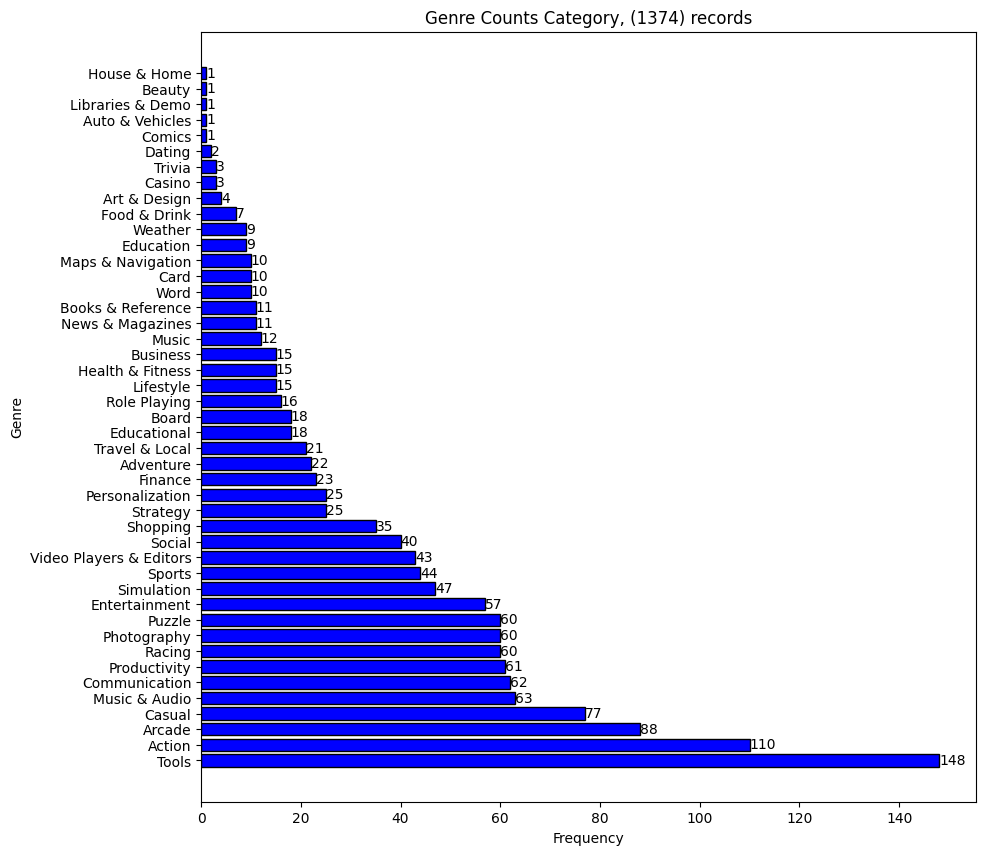

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Plot 1 - Histogram of Score

plt.hist(google_live1_cleaned['score'], bins=25, color='blue', edgecolor='black')
plt.title(f'Score Category, ({len(google_live1_cleaned)}) records')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Plot 2 - Histogram of Install Count

plt.hist(google_live1_cleaned['installs'], bins=10, color='blue', edgecolor='black')
plt.title(f'Install Counts Category, ({len(google_live1_cleaned)}) records')
plt.xlabel('installs')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot 3 - Horizontal Bar Chart of Genre

genre_counts = google_live1_cleaned['genre'].value_counts()
plt.figure(figsize=(10, 10))

plt.barh(genre_counts.index, genre_counts, color='blue', edgecolor='black')
for index, value in enumerate(genre_counts):
    plt.text(value, index, str(value), ha='left', va='center')
plt.title(f'Genre Counts Category, ({len(google_live1_cleaned)}) records')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()


In [193]:
apple.head(5)

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,0.0,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.0,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.0,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,2.99,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,0.0,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


In [195]:
column_list = list(google_live1_cleaned['title'])
len(column_list)

122

In [200]:
import requests
import json
from bs4 import BeautifulSoup

# To extract relevant info from respecitve "app info" url
def get_app_link(query):
    try:
        html_page = requests.get("https://www.apple.com/sg/search/" + query + "?src=serp")
        html_page.raise_for_status()  # Check if the request was successful

        soup1 = BeautifulSoup(html_page.text, 'html.parser')
        app_link = soup1.find('a', class_='icon icon-after icon-chevronright')['href']
        app_id = app_link.split('/')[-1]
        return app_id

    except Exception as e:
        # Handle the exception (e.g., print an error message)
        print(f"Error: {e}")
        return None  # Return None or any other value indicating failure

def get_app_info(appname):
    try:
        # Retrieve the App ID using the get_app_link function
        app_id = get_app_link(appname)

        if app_id is None:
            raise ValueError("Failed to retrieve App ID")

        # Fetch the app information using the retrieved App ID
        html_page = requests.get("https://apps.apple.com/sg/app/" + app_id)
        html_page.raise_for_status()

        soup2 = BeautifulSoup(html_page.text, 'html.parser')

        # Extract information from script tags
        info_boxes = [json.loads(info_box.text.strip()) for info_box in soup2.find_all('script', {'type': 'application/ld+json'})]

        extracted_info = {}

        if info_boxes:
            info_box = info_boxes[0]  # Assuming you want information from the first box
            extracted_info = {
                'name': info_box.get('name'),
                'description': info_box.get('description'),
                'applicationCategory': info_box.get('applicationCategory'),
                'datePublished': info_box.get('datePublished'),
                'operatingSystem': info_box.get('operatingSystem'),
                'authorname': info_box['author'].get('name'),
                'authorurl': info_box['author'].get('url'),
                'ratingValue': info_box['aggregateRating'].get('ratingValue'),
                'reviewCount': info_box['aggregateRating'].get('reviewCount'),
                'price': info_box['offers'].get('price'),
                'priceCurrency': info_box['offers'].get('priceCurrency'),
                # 'Category': info_box['offers']['category']
            }

        # Add star rating information to the extracted_info dictionary
        soup = BeautifulSoup(html_page.text, 'html.parser')
        width_styles = soup.find_all('div', class_='we-star-bar-graph__bar__foreground-bar')
        percentages = [style['style'].split(': ')[1].rstrip(';') for style in width_styles]
        star_ratings = ['5 Star', '4 Star', '3 Star', '2 Star', '1 Star']

        result = list(zip(star_ratings, percentages))

        extracted_info['star_ratings'] = result

        return extracted_info

    except Exception as e:
        # Handle the exception (e.g., print an error message)
        print(f"Error: {e}")
        return None  # Return None or any other value indicating failure

In [202]:
# Create an empty list to collect results
app_info_list = []

# Iterate through each query in the column_list
for query in column_list:
    try:
        # Get app info for the current query
        app_info = get_app_info(query)

        # Add the query to the extracted info
        app_info['query'] = query

        # Append the app info to the list
        app_info_list.append(app_info)

        print(f"App info for {query}:")
        print(app_info)
        print("\n")

    except Exception as e:
        # Handle the exception (e.g., print an error message)
        print(f"Error for {query}: {e}")

# Convert the list of dictionaries into a DataFrame
app_info_df = pd.DataFrame(app_info_list)

Error: 'NoneType' object is not subscriptable
Error: Failed to retrieve App ID
Error for Samsung Email: 'NoneType' object does not support item assignment
Error: 'NoneType' object is not subscriptable
Error: Failed to retrieve App ID
Error for Samsung Link (Terminated): 'NoneType' object does not support item assignment
Error: 'NoneType' object is not subscriptable
Error: Failed to retrieve App ID
Error for Netflix: 'NoneType' object does not support item assignment
App info for PUBG MOBILE:
{'name': 'PUBG MOBILE', 'description': "ã\x80\x90Epic battle royale masterpieceã\x80\x91\nLots of events for you to explore.Climb to the top in PUBG MOBILE and fire at will. PUBG MOBILE is the original battle royale game on mobile and one of the best mobile shooting games.\n\nã\x80\x90Extreme battles in 10-minute matchesã\x80\x91\nPrepare your firearms, respond to the call for battle in PUBG MOBILE, and fire at will.\n\nã\x80\x90Tons of maps and modesã\x80\x91\nPUBG MOBILE has many maps and gamepla

In [204]:
len(app_info_df)

17